<a href="https://colab.research.google.com/github/devrasmeriya/Machine-Learning-Projects/blob/main/datagen_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
filename='/content/train_SOaYf6m.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization,Dense,Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('/content/train_SOaYf6m/train.csv')
y=train.drop(['image_names'],axis=1).values


In [ ]:
from keras.preprocessing import image
import numpy as np
train_image = []
for i in range(train.shape[0]):
    img = image.load_img('/content/train_SOaYf6m/images/'+train['image_names'][i],target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
img=datagen.flow(X,y,batch_size=1,save_prefix='img',shuffle=False)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


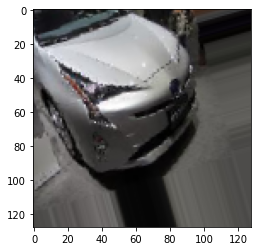

In [ ]:
x=img[0][0]
plt.imshow(x[0].reshape(128,128,3))

In [ ]:
img[5][0].shape

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(1, 128, 128, 3)

In [ ]:
img[6][1].shape

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(1, 1)

In [ ]:
image=[]
y_=[]
for i in range(len(train)):
  image.append(np.array(img[i][0]).reshape(128,128,3))
  y_.append(np.array(img[i][1]))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
image=np.array(image)
image.shape

(1646, 128, 128, 3)

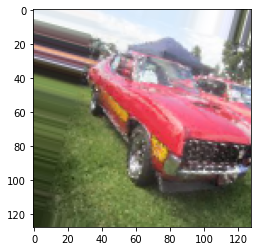

In [ ]:
plt.imshow(image[1])

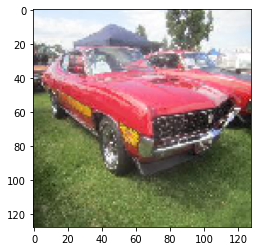

In [ ]:
plt.imshow(X[1])

In [ ]:
X=np.append(X,image,axis=0)

In [ ]:
X.shape
y_=np.array(y_)
y_=y_.reshape(-1,1)
y_

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
y=np.append(y,y_,axis=0)

In [ ]:
X.shape

(3292, 128, 128, 3)

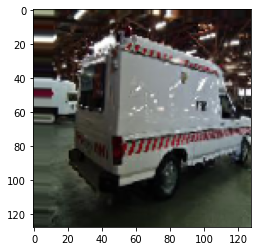

In [ ]:
plt.imshow(X[-1])

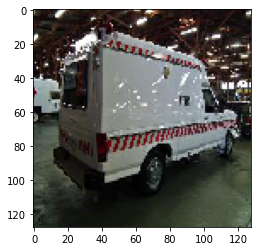

In [ ]:
plt.imshow(X[1645])

In [ ]:
y[-1],y[1645]

(array([1]), array([1]))